In [114]:
import os
import sys
import shutil
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
flies = [139,142,143,146,147,148,149]
flies = [str(i) for i in flies]

In [75]:
savedir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220421_make_nonmyr_meanbrain/clean_anats'
#os.mkdir(savedir)

In [113]:
for fly in flies:
    print(fly)
    source = os.path.join(dataset_path, 'fly_' + fly, 'anat_0', 'moco', 'anatomy_channel_1_moc_mean_clean.nii')
    dest = os.path.join(savedir, F'anat_{fly}.nii')
    shutil.copyfile(source, dest)
    brain = np.asarray(nib.load(anat_file).get_data().squeeze(), dtype='float32')

    

139
142
143
146
147
148
149


In [117]:
for fly in flies:
    print(fly)
    anat_file = os.path.join(dataset_path, 'fly_' + fly, 'anat_0', 'moco', 'anatomy_channel_1_moc_mean_clean.nii')
    anat = np.asarray(nib.load(anat_file).get_data().squeeze(), dtype='float32')
    anat = ants.from_numpy(anat)
    anat.set_spacing((.65,.65,1))
    anat = ants.resample_image(anat,(2,2,2),use_voxels=False)
    save_file = os.path.join(savedir, F'anat_{fly}')
    nib.Nifti1Image(anat.numpy(), np.eye(4)).to_filename(save_file)

139
142
143
146
147
148
149


In [118]:
anat

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (333, 166, 121)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [109]:
anat_file = os.path.join(dataset_path, 'fly_' + flies[2], 'anat_0', 'moco', 'anatomy_channel_1_moc_mean_clean.nii')

In [110]:
brain = np.asarray(nib.load(anat_file).get_data().squeeze(), dtype='float32')
brain.shape

(1024, 512, 241)

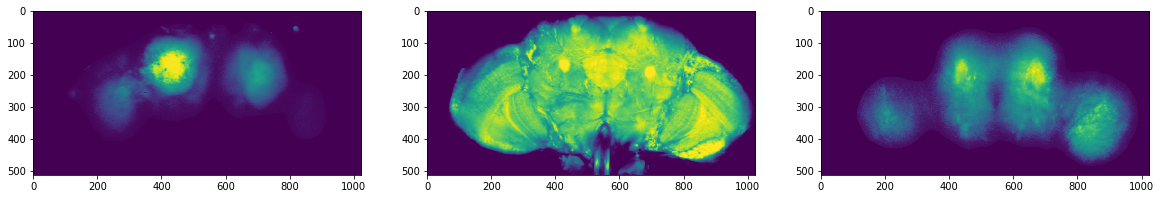

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(brain[:,:,0].T)

plt.subplot(1,3,2)
plt.imshow(brain[:,:,100].T)

plt.subplot(1,3,3)
plt.imshow(brain[:,:,-1].T)